In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
import geopandas as gpd
import transbigdata as tbd
# import geoplot as gplt

d:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
#读取数据
#新建dataframe
data = pd.DataFrame()
for i in range(0,24):
    temp_data = pd.read_csv('D:/研究生/7.位置数据推测出行数据修正/data/sample_rate_grid_hour/sample_rate5_rect500_hour%d.csv' %i,encoding='utf-8-sig')
    data = data.append(temp_data)
data = data.reset_index(drop=True)

In [23]:
data

,poly_id,geometry,road_length,road_density,交通设施服务,住宿服务,体育休闲服务,公共设施,公司企业,医疗保健服务,商务住宅,地名地址信息,摩托车服务,政府机构及社会团体,汽车服务,汽车销售,生活服务,科教文化服务,购物服务,金融保险服务,风景名胜,餐饮服务,generate_trip_num,real_trip_num,poi_num,hour
0,0,POLYGON ((104.05279570839805 30.57022290260316...,0.355465,10.256237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,POLYGON ((104.05279570839805 30.57022290260316...,1.472385,8.242282,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
2,2,POLYGON ((104.05802403215966 30.57022290260317...,1.391995,5.649882,7.0,1.0,4.0,2.0,123.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,20.0,3.0,2.0,0.0,7.0,0.0,0.0,184.0,0
3,3,POLYGON ((104.06325235592128 30.57022290260317...,1.261478,5.292203,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0
4,4,POLYGON ((104.06848067968289 30.57022290260317...,1.121729,5.078119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55027,2288,POLYGON ((104.08939397472933 30.78605995251147...,1.006246,4.769686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
55028,2289,POLYGON ((104.09462229849096 30.78605995251147...,1.006475,4.464578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
55029,2290,POLYGON ((104.09985062225256 30.78605995251147...,0.905919,3.785544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
55030,2291,POLYGON ((104.10507894601417 30.78605995251147...,1.062639,4.801205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23


In [24]:
data.columns

Index(['poly_id', 'geometry', 'road_length', 'road_density', '交通设施服务', '住宿服务',
       '体育休闲服务', '公共设施', '公司企业', '医疗保健服务', '商务住宅', '地名地址信息', '摩托车服务',
       '政府机构及社会团体', '汽车服务', '汽车销售', '生活服务', '科教文化服务', '购物服务', '金融保险服务', '风景名胜',
       '餐饮服务', 'generate_trip_num', 'real_trip_num', 'poi_num', 'hour'],
      dtype='object')

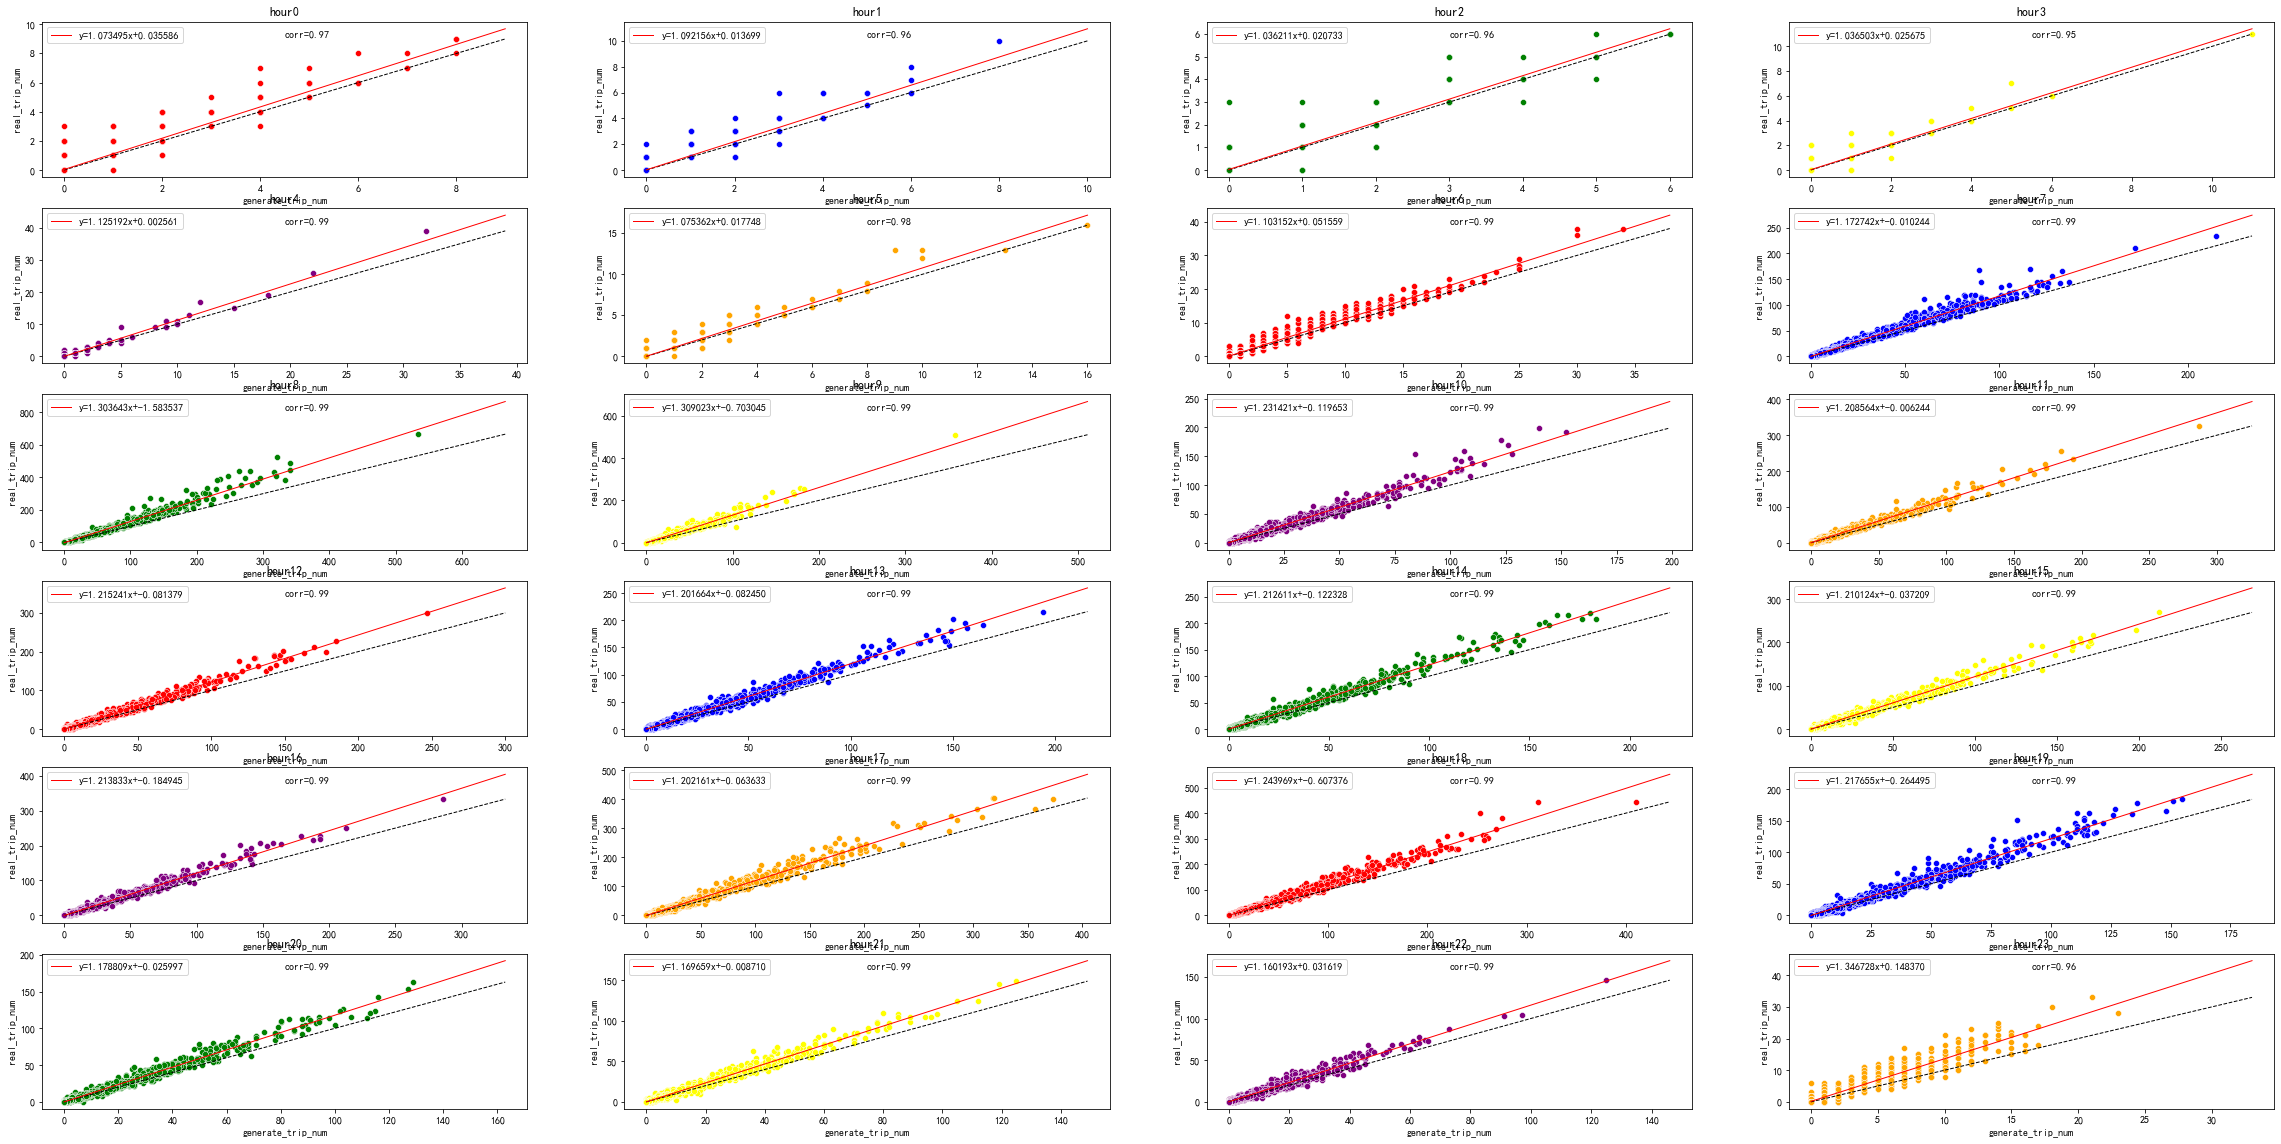

In [25]:
fig,axes = plt.subplots(6,4,figsize=(40,20))
colors = ['red','blue','green','yellow','purple','orange']
for i,color in zip(range(0,24),colors*4):
    ax = axes[i//4,i%4]
    ax.set_title('hour%d' %i)
    data_hour = data[data['hour']==i]
    sns.scatterplot(x='generate_trip_num',y='real_trip_num',data=data_hour,ax=ax,color=color)
    ax.set_xlabel('generate_trip_num')
    ax.set_ylabel('real_trip_num')
    # 绘制y=x直线
    # 取x轴和y的最大值
    x_max = max(data_hour['generate_trip_num'].max(),data_hour['real_trip_num'].max())
    ax.plot([0,x_max],[0,x_max],color='black', linewidth=1, linestyle='--')

    # 计算相关系数
    corr = data_hour['generate_trip_num'].corr(data_hour['real_trip_num'])
    ax.text(0.5,0.9,'corr=%.2f' %corr,transform=ax.transAxes)

    # 拟合直线
    # 计算线性回归的系数
    slope, intercept = np.polyfit(data_hour['generate_trip_num'], data_hour['real_trip_num'], 1)
    # 绘制拟合直线
    ax.plot([0,x_max],[intercept,slope*x_max+intercept],color='red', linewidth=1, linestyle='-',\
                    label='y={:.6f}x+{:.6f}'.format(slope,intercept))
    ax.legend()




    # X = df.loc[:, 'generate_trip_num']
    # X = sm.add_constant(X) 
    # y = df.loc[:, 'real_trip_num']
    # model = sm.OLS(y, X,hasconst=True).fit()
    # # 画出回归直线
    # x = np.linspace(0, df_max, 100)
    # y = model.params[0] + model.params[1] * x
    # ax.plot(x, y, color='green', linewidth=1, linestyle='dashdot',label='y={:.6f}x+{:.6f}'.format(model.params[1],model.params[0]))

plt.savefig('C:/Users/my/Desktop/sample_rate5_grid_500_hour.jpg',dpi=300)


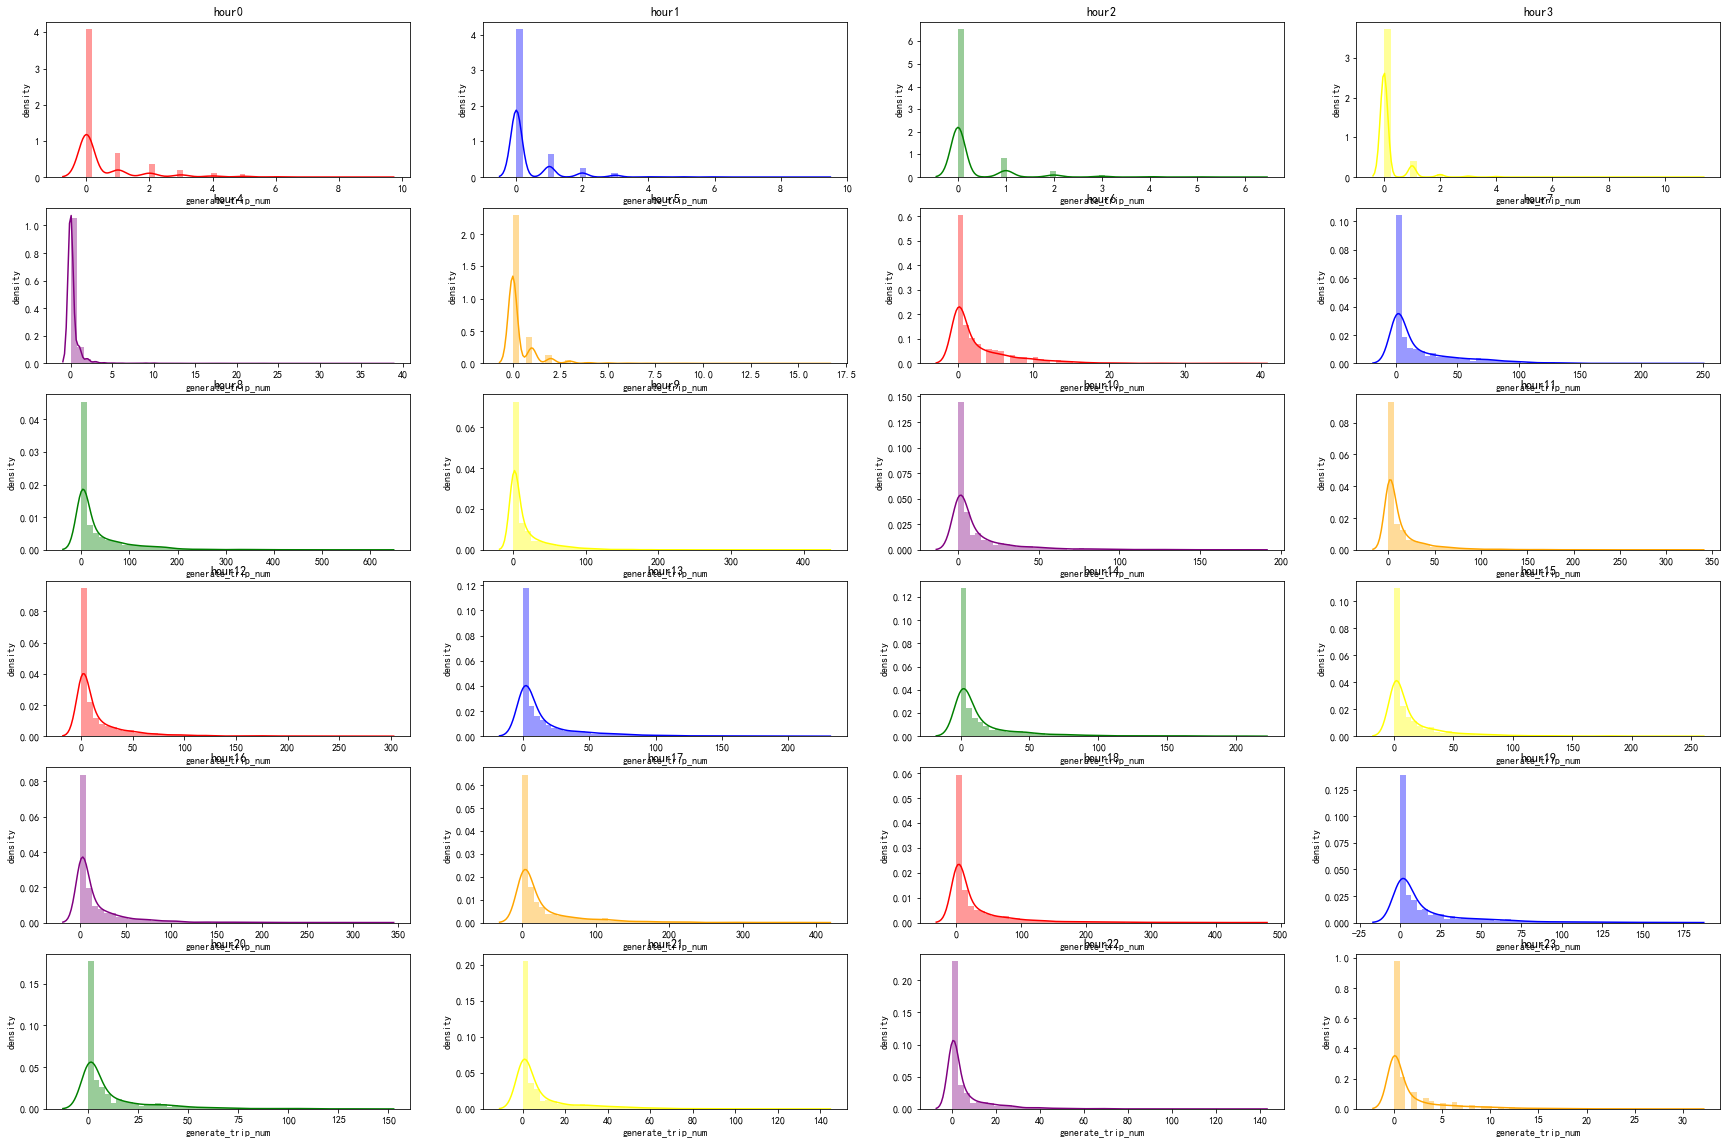

In [18]:
# 绘制各小时的出行量
